In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
men=pd.read_csv(r'/content/drive/MyDrive/myntra_csv/men_final.csv')
women=pd.read_csv(r'/content/drive/MyDrive/myntra_csv/women_final.csv')


In [ ]:
men['gender']='Men'
women['gender']='Women'

In [ ]:
frames=[men,women]
data=pd.concat(frames)
print(data.head())

                brand                 seller  \
0  Shaftesbury London    TIMES INTERNATIONAL   
1            HERE&NOW        Omnitech Retail   
2              V-Mart  V-Mart Retail Limited   
3                MANQ      A. R. ENTERPRISES   
4              V-Mart  V-Mart Retail Limited   

                                        product_name  rating  total_bought  \
0  Navy Regular Fit Single-Breasted Formal Pure C...     3.8         502.0   
1             Men Beige Solid Single Breasted Blazer     3.9         125.0   
2               Checked Single-Breasted Tweed Blazer     0.0           0.0   
3  Men Charcoal Grey Slim Fit Solid Single Breast...     4.1         198.0   
4              Checked Single-Breasted Formal Blazer     0.0           0.0   

   strike_price  discounted_price  discount  \
0        5999.0            1799.0      70.0   
1        5999.0            3599.0      40.0   
2        2299.0            2069.0      10.0   
3        5999.0            2459.0      59.0   
4      

In [ ]:
data['Available_sizes'].fillna(' ',inplace=True)

In [ ]:
data.isnull().sum()

brand               0
seller              0
product_name        0
rating              0
total_bought        0
strike_price        0
discounted_price    0
discount            0
Available_sizes     0
Specifications      0
reviews             0
Material            0
Type                0
review_clean        0
review_sentiment    0
gender              0
dtype: int64

In [ ]:
print(data['gender'].head())
print(data['gender'].tail())

0    Men
1    Men
2    Men
3    Men
4    Men
Name: gender, dtype: object
6884    Women
6885    Women
6886    Women
6887    Women
6888    Women
Name: gender, dtype: object


In [ ]:
data = data.sample(frac=1, random_state=42)

In [ ]:
print(data['gender'].head())
print(data['gender'].tail())

836     Women
1880      Men
460     Women
4889      Men
3194      Men
Name: gender, dtype: object
5191      Men
6440    Women
5390      Men
860       Men
292     Women
Name: gender, dtype: object


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [ ]:
data.columns

Index(['brand', 'seller', 'product_name', 'rating', 'total_bought',
       'strike_price', 'discounted_price', 'discount', 'Available_sizes',
       'Specifications', 'reviews', 'Material', 'Type', 'review_clean',
       'review_sentiment', 'gender'],
      dtype='object')

In [ ]:
data

,brand,seller,product_name,rating,total_bought,strike_price,discounted_price,discount,Available_sizes,Specifications,reviews,Material,Type,review_clean,review_sentiment,gender
836,Fabcartz,RK Textiles,Woven Design Semi-Stitched Lehenga & Unstitche...,4.7,3.0,5999.0,1799.0,70.0,Onesize,"Art Silk, Art Silk, Silk, Silk, Zari, Flared, ...",So beautiful... Quality is very good...,Top Fabric : Art Silk Bottom Fabric : Art Silk...,Cholis,So beautiful... Quality is very good...,POSITIVE,Women
1880,Park Avenue,Raymond Limited,Slim Fit Checked Pure Cotton Formal Shirt,4.4,5.0,1699.0,764.0,55.0,"39 Rs. 764, 40 Rs. 764, 42 Rs. 764, 44 Rs. 764...","Long Sleeves, Spread Collar, Slim Fit, Grid Ta...",No review,"85% polyester, 15% cotton Machine Wash, Polyes...",Formal shirt,No review,NEGATIVE,Men
460,Cottinfab,D S S COTTINFAB LTD,Women Black Striped Open Front Blazer,3.8,289.0,2599.0,1039.0,60.0,"S, M, L, XL, XXL, 3XL","Button, Notched Lapel, Pure Cotton, Regular Fi...",Fit:As expected\nMaterial: Very good\nComfort:...,use mild detergent and wash similar colors,Women Blazers,Fit:As expected\nMaterial: Very good\nComfort:...,POSITIVE,Women
4889,Wintage,WINTAGE GARMENTS PRIVATE LIMITED,Men Orange Solid Single-Breasted Regular Fit P...,3.5,4.0,3999.0,2759.0,31.0,"36, 38, 40, 42, 44, 46","Solid, Polyviscose, Collarless, Party, Regular...","Not that good as shown in pic, Awesome",Polycotton Dry Clean Only,Men Suits,"Not that good as shown in pic, Awesome",NEGATIVE,Men
3194,Harvard,Indiflashmart,Men Slim Fit Light Fade Stretchable Jeans,4.0,39.0,1698.0,679.0,60.0,"28, 30, 32, 34, 36","Clean Look, Mid-Rise, Light Fade, Dark, Slim F...",Poor quality cloth,"79% Cotton, 19% Polyester, 2% Elastane Machine...",Men Jeans,Poor quality cloth,NEGATIVE,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,CAMLA,JAIN AMAR CLOTHING PVT LTD,Open Knit Self Design Turtle Neck Long Sleeves...,0.0,0.0,2790.0,1395.0,50.0,"S, M, L, XL, XXL, 3XL","Acrylic, Self Design, Long Sleeves, Turtle Nec...",No review,Acrylic Machine Wash,Men Sweater,No review,NEGATIVE,Men
6440,Fleximaa,FLEXIBLE APPARELS,Typography Printed V-Neck Pure Cotton T-Shirt,0.0,0.0,749.0,399.0,0.0,"S, M, L, XL, XXL, 3XL, 4XL","Pure Cotton, Regular Fit, Regular, Typography ...",No review,Pure Cotton Hand Wash,women Tshirts,No review,NEGATIVE,Women
5390,Roadster,GARG ACRYLICS LTD.- SJIT,Men Grey Melange & White Colourblocked Pullove...,4.3,1800.0,1499.0,1139.0,0.0,"S, M, L, XL","Acrylic, Colourblocked, Long Sleeves, Mock Col...",🌟 Just added the Roadster Men’s Grey Melange a...,Material: Acrylic Machine Wash,Men Sweater,:glowing_star: Just added the Roadster Men’s G...,POSITIVE,Men
860,Nautica,Truenet Commerce,Pure Cotton Classic Opaque Checked Casual Shirt,4.5,18.0,2799.0,979.0,65.0,"38, 40, 42, 44, 46","Long Sleeves, Button-Down Collar, Regular Fit,...",excellent fitings\nvalue for money,100% Cotton Machine wash,Casual Shirt,excellent fitings\nvalue for money,POSITIVE,Men


In [ ]:
text_features=data['brand']+" "+data['gender']+" "+data['seller']+" "+data['Available_sizes']+" "+data['Specifications']+" "+data['Material']+" "+data['Type']

In [ ]:
feature_columns=data[['brand','gender','seller','Available_sizes','Specifications','Material','Type','strike_price']]

In [ ]:
text_features

836     Fabcartz Women RK Textiles Onesize Art Silk, A...
1880    Park Avenue Men Raymond Limited 39 Rs. 764, 40...
460     Cottinfab Women D S S COTTINFAB LTD S, M, L, X...
4889    Wintage Men WINTAGE GARMENTS PRIVATE LIMITED 3...
3194    Harvard Men Indiflashmart 28, 30, 32, 34, 36 C...
                              ...                        
5191    CAMLA Men JAIN AMAR CLOTHING PVT LTD S, M, L, ...
6440    Fleximaa Women FLEXIBLE APPARELS S, M, L, XL, ...
5390    Roadster Men GARG ACRYLICS LTD.- SJIT S, M, L,...
860     Nautica Men Truenet Commerce 38, 40, 42, 44, 4...
292     SALT ATTIRE Women MIMOTO TECHNOLOGIES PRIVATE ...
Length: 13867, dtype: object

In [ ]:
feature_columns

,brand,gender,seller,Available_sizes,Specifications,Material,Type,strike_price
836,Fabcartz,Women,RK Textiles,Onesize,"Art Silk, Art Silk, Silk, Silk, Zari, Flared, ...",Top Fabric : Art Silk Bottom Fabric : Art Silk...,Cholis,5999.0
1880,Park Avenue,Men,Raymond Limited,"39 Rs. 764, 40 Rs. 764, 42 Rs. 764, 44 Rs. 764...","Long Sleeves, Spread Collar, Slim Fit, Grid Ta...","85% polyester, 15% cotton Machine Wash, Polyes...",Formal shirt,1699.0
460,Cottinfab,Women,D S S COTTINFAB LTD,"S, M, L, XL, XXL, 3XL","Button, Notched Lapel, Pure Cotton, Regular Fi...",use mild detergent and wash similar colors,Women Blazers,2599.0
4889,Wintage,Men,WINTAGE GARMENTS PRIVATE LIMITED,"36, 38, 40, 42, 44, 46","Solid, Polyviscose, Collarless, Party, Regular...",Polycotton Dry Clean Only,Men Suits,3999.0
3194,Harvard,Men,Indiflashmart,"28, 30, 32, 34, 36","Clean Look, Mid-Rise, Light Fade, Dark, Slim F...","79% Cotton, 19% Polyester, 2% Elastane Machine...",Men Jeans,1698.0
...,...,...,...,...,...,...,...,...
5191,CAMLA,Men,JAIN AMAR CLOTHING PVT LTD,"S, M, L, XL, XXL, 3XL","Acrylic, Self Design, Long Sleeves, Turtle Nec...",Acrylic Machine Wash,Men Sweater,2790.0
6440,Fleximaa,Women,FLEXIBLE APPARELS,"S, M, L, XL, XXL, 3XL, 4XL","Pure Cotton, Regular Fit, Regular, Typography ...",Pure Cotton Hand Wash,women Tshirts,749.0
5390,Roadster,Men,GARG ACRYLICS LTD.- SJIT,"S, M, L, XL","Acrylic, Colourblocked, Long Sleeves, Mock Col...",Material: Acrylic Machine Wash,Men Sweater,1499.0
860,Nautica,Men,Truenet Commerce,"38, 40, 42, 44, 46","Long Sleeves, Button-Down Collar, Regular Fit,...",100% Cotton Machine wash,Casual Shirt,2799.0


In [ ]:
feature_columns.fillna('No input',inplace=True)

<ipython-input-17-d64f4d9e44c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_columns.fillna('No input',inplace=True)


In [ ]:
feature_columns.shape

(13867, 8)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
text_vectorized = tfidf_vectorizer.fit_transform(text_features)

In [ ]:
text_vectorized.shape

(13867, 3455)

In [ ]:
target=data['strike_price']

In [ ]:
X=text_vectorized
y=target

In [ ]:
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (13867, 3455)
Shape of y:  (13867,)


In [ ]:
X=text_vectorized
y=target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

(13867, 3455)
(13867,)
Mean Squared Error: 512389.917724019


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 395.4765654928849
Mean Squared Error: 512389.917724019
R^2 Score: 0.9231496763271603


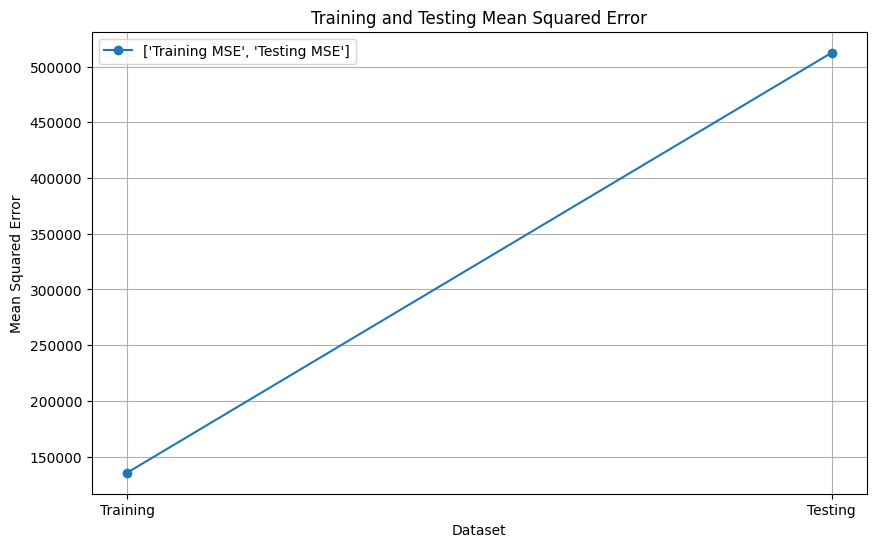

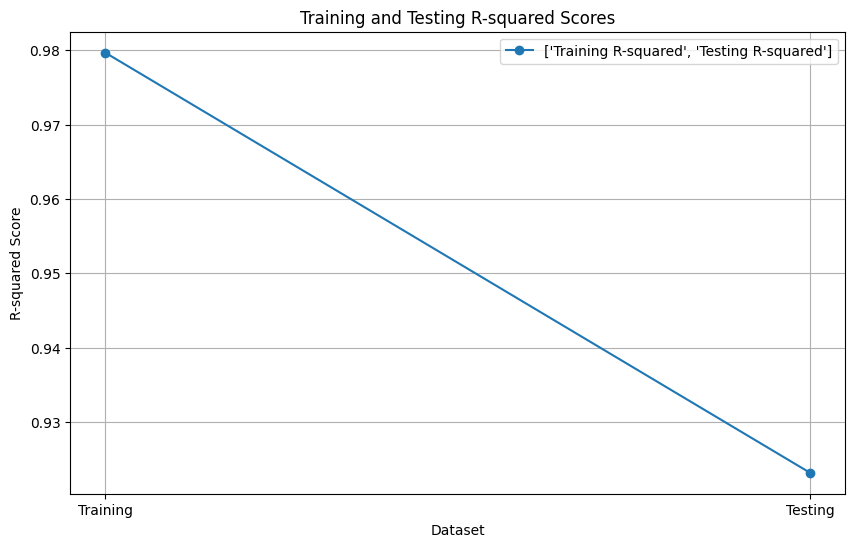

In [ ]:
from sklearn.metrics import r2_score

# Train the Random Forest Regressor on the training data


# Make predictions on the training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate MSE and R-squared scores for training and testing data
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_r2 = r2_score(y_train, train_predictions)
test_r2 = r2_score(y_test, test_predictions)

# Plot training and testing MSE
plt.figure(figsize=(10, 6))
plt.plot([train_mse, test_mse], label=['Training MSE', 'Testing MSE'], marker='o')
plt.xlabel('Dataset')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Mean Squared Error')
plt.xticks(range(2), ['Training', 'Testing'])
plt.legend()
plt.grid(True)
plt.show()

# Plot training and testing R-squared scores
plt.figure(figsize=(10, 6))
plt.plot([train_r2, test_r2], label=['Training R-squared', 'Testing R-squared'], marker='o')
plt.xlabel('Dataset')
plt.ylabel('R-squared Score')
plt.title('Training and Testing R-squared Scores')
plt.xticks(range(2), ['Training', 'Testing'])
plt.legend()
plt.grid(True)
plt.show()


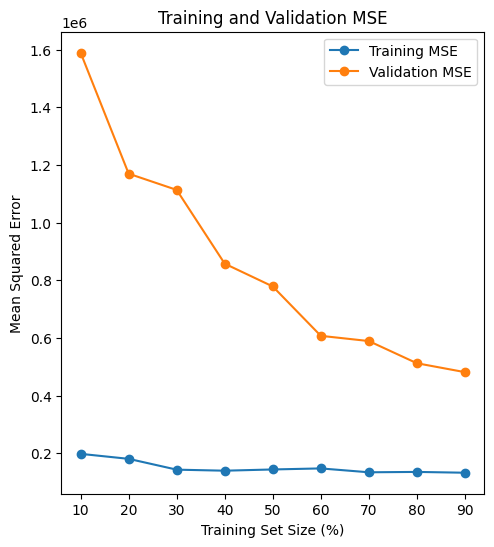

In [ ]:
# Lists to store training and validation MSE and R-squared scores
train_mse_scores = []
val_mse_scores = []
train_r2_scores = []
val_r2_scores = []

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Iterate over different training set sizes
for train_size in range(10, 91, 10):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size/100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate MSE and R-squared for training and validation sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)

    # Append scores to lists
    train_mse_scores.append(train_mse)
    val_mse_scores.append(val_mse)
    train_r2_scores.append(train_r2)
    val_r2_scores.append(val_r2)

# Plotting
plt.figure(figsize=(12, 6))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(range(10, 91, 10), train_mse_scores, label='Training MSE', marker='o')
plt.plot(range(10, 91, 10), val_mse_scores, label='Validation MSE', marker='o')
plt.title('Training and Validation MSE')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Mean Squared Error')
plt.legend()

#


n_estimators: 10, max_depth: None, min_samples_split: 2
Train R-squared: 0.9728486100170004, Validation R-squared: 0.9168497762936425, MSE: 554393.7129661273
n_estimators: 10, max_depth: None, min_samples_split: 5
Train R-squared: 0.9697442649542096, Validation R-squared: 0.9159454618585214, MSE: 560423.1163162149
n_estimators: 10, max_depth: None, min_samples_split: 10
Train R-squared: 0.9617121723610901, Validation R-squared: 0.9142280670749383, MSE: 571873.6311586243
n_estimators: 10, max_depth: 10, min_samples_split: 2
Train R-squared: 0.9002615127084187, Validation R-squared: 0.8744465554120626, MSE: 837111.8827846468
n_estimators: 10, max_depth: 10, min_samples_split: 5
Train R-squared: 0.898546191535736, Validation R-squared: 0.873668691446682, MSE: 842298.1934489795
n_estimators: 10, max_depth: 10, min_samples_split: 10
Train R-squared: 0.893726414904501, Validation R-squared: 0.8752800950594811, MSE: 831554.3614763614
n_estimators: 10, max_depth: 20, min_samples_split: 2
Train

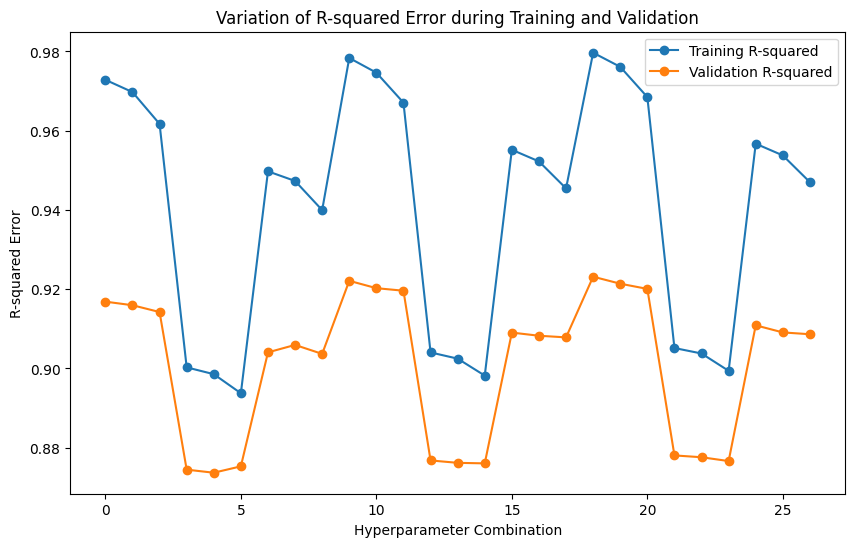

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define X and y
X = text_vectorized
y = target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lists to store R-squared error for training and validation
train_r2_scores = []
val_r2_scores = []

# Hyperparameters to tune
n_estimators_values = [10, 50, 100]
max_depth_values = [None, 10, 20]
min_samples_split_values = [2, 5, 10]

# Iterate over hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        for min_samples_split in min_samples_split_values:
            # Initialize and train the model
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
            model.fit(X_train, y_train)

            # Make predictions
            y_train_pred = model.predict(X_train)
            y_val_pred = model.predict(X_test)

            # Calculate R-squared for training and validation sets
            train_r2 = r2_score(y_train, y_train_pred)
            val_r2 = r2_score(y_test, y_val_pred)

            # Append R-squared scores to lists
            train_r2_scores.append(train_r2)
            val_r2_scores.append(val_r2)

            # Print and evaluate other metrics
            mse = mean_squared_error(y_test, y_val_pred)
            print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split}")
            print(f"Train R-squared: {train_r2}, Validation R-squared: {val_r2}, MSE: {mse}")

# Plot variation of R-squared error during training and validation
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_r2_scores)), train_r2_scores, label='Training R-squared', marker='o')
plt.plot(range(len(val_r2_scores)), val_r2_scores, label='Validation R-squared', marker='o')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('R-squared Error')
plt.title('Variation of R-squared Error during Training and Validation')
plt.legend()
plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with specified hyperparameters
final_model = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

# Train the Random Forest Regressor
final_model.fit(X_train, y_train)

# Make predictions on the test set
predictions1 = final_model.predict(X_test)

# Evaluate the model u

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions1)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions1)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, predictions1)
print(f'R^2 Score: {r2}')


Mean Absolute Error: 395.4765654928849
Mean Squared Error: 512389.917724019
R^2 Score: 0.9231496763271603


In [ ]:
user_text_input = input("Enter the text feature: ")
user_text_vectorized = tfidf_vectorizer.transform([user_text_input])
user_prediction = final_model.predict(user_text_vectorized)

# Display the predicted price
print(f'Predicted Price: {user_prediction[0]}')

Enter the text feature: SINGNI Women Purple Ethnic Motifs Embroidered Mirror Work Kurta with Trousers & Dupatta S, M, L, XL, XXL, XXXL Purple embroidered Kurta with Trousers with dupatta Ethnic motifs embroidered Anarkali shape Regular style Round neck, three-quarter regular sleeves Mirror work detail Floor length length with flared hem Viscose rayon machine weave fabric Printed Trousers Elasticated waistband Kurta material: Viscose Rayon Trouser material: Viscose Rayon Dupatta; Poly chiffon Dry Clean  Specifications Sleeve Length Three-Quarter Sleeves Top Shape Anarkali Top Type Kurta Bottom Type Trousers Dupatta With Dupatta Top Pattern Embroidered Top Design Styling Regular Top Hemline Flared transparency low
Predicted Price: 5754.888000000001


Training a model by splitting columns and then vectorizing using TF-IDF vectorizer

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
data = feature_columns

# TF-IDF Vectorization for each column
tfidf_vectorizers = {}
for col in data.columns:
    if col != 'strike_price':
        tfidf_vectorizer = TfidfVectorizer()
        tfidf_matrix = tfidf_vectorizer.fit_transform(data[col])
        tfidf_vectorizers[col] = tfidf_vectorizer

# Combine TF-IDF vectors
X = tfidf_matrix
y = data['strike_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)
print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)




Training R-squared: 0.691826866943998
Testing R-squared: 0.7162302941955712
Training MSE: 2057119.0872497845
Testing MSE: 1891999.0087314036
Training MAE: 832.8772737377577
Testing MAE: 806.853322637357


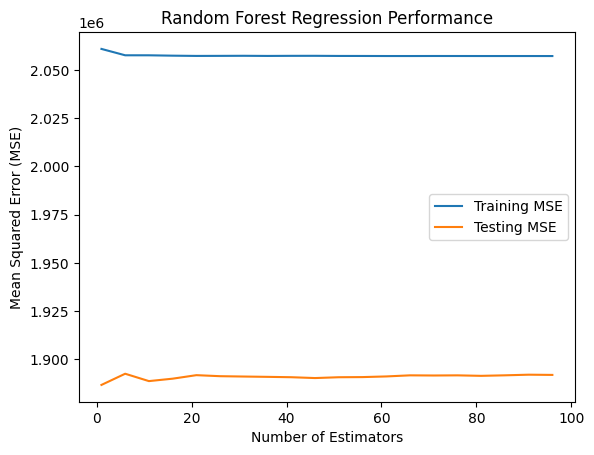

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Range of number of estimators to try
n_estimators_range = np.arange(1, 100, 5)

# Train Random Forest Regressor with different number of estimators
train_mse = []
test_mse = []
for n_estimators in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_mse.append(mean_squared_error(y_train, y_pred_train))
    test_mse.append(mean_squared_error(y_test, y_pred_test))

# Plot the Mean Squared Error (MSE) across different numbers of estimators
plt.plot(n_estimators_range, train_mse, label='Training MSE')
plt.plot(n_estimators_range, test_mse, label='Testing MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Random Forest Regression Performance')
plt.legend()
plt.show()


In [ ]:
#ValueError: Invalid parameter 'max_samples_leaf' for estimator RandomForestRegressor(random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [ ]:
#Previous works

In [ ]:
target=data['strike_price']

In [ ]:
text_features.fillna('No input',inplace=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
text_vectorized = tfidf_vectorizer.fit_transform(text_features)

In [ ]:
X=text_vectorized
y=target
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

(13867, 3455)
(13867,)
Mean Squared Error: 512389.917724019


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 395.4765654928849
Mean Squared Error: 512389.917724019
R^2 Score: 0.9231496763271603


In [ ]:
user_text_input = input("Enter the text feature: ")
user_text_vectorized = tfidf_vectorizer.transform([user_text_input])
user_prediction = model.predict(user_text_vectorized)

# Display the predicted price
print(f'Predicted Price: {user_prediction[0]}')

Enter the text feature:  women lehenga choli polister fusion wear georgette dupatta embrodary
Predicted Price: 5036.42


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(X_train, y_train)

# Make predictions
predictions2 = model2.predict(X_test)

# Evaluate the model
mse2 = mean_squared_error(y_test, predictions2)
print(f'Mean Squared Error: {mse2}')

Mean Squared Error: 860289.4862942527


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions2)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions2)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, predictions2)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 452.4401872000466
Mean Squared Error: 873150.1977108568
R^2 Score: 0.8690413823770329


In [ ]:
user_text_input = input("Enter the text feature: ")
user_text_vectorized = tfidf_vectorizer.transform([user_text_input])
user_prediction = model2.predict(user_text_vectorized)

# Display the predicted price
print(f'Predicted Price: {user_prediction[0]}')

Enter the text feature: women lehenga choli polister fusion wear georgette dupatta embrodary
Predicted Price: 4399.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBRegressor

In [ ]:
X=text_vectorized
y=target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost Regressor
model3 = XGBRegressor(random_state=42)
model3.fit(X_train, y_train)

# Make predictions
predictions3 = model3.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions3)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 547640.7940136391


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions3)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions3)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, predictions3)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 467.5945914006525
Mean Squared Error: 547640.7940136391
R^2 Score: 0.9178626065412405


In [ ]:
user_text_input = input("Enter the text feature: ")
user_text_vectorized = tfidf_vectorizer.transform([user_text_input])
user_prediction = model3.predict(user_text_vectorized)

# Display the predicted price
print(f'Predicted Price: {user_prediction[0]}')

Enter the text feature: women lehenga choli polyster fusion wear georgette dupatta embroidary
Predicted Price: 3345.218505859375


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor  # Import AdaBoostRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the AdaBoost Regressor
model4 = AdaBoostRegressor(random_state=42)  # Use AdaBoostRegressor
model4.fit(X_train, y_train)

# Make predictions
predictions4 = model4.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions4)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions4)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions4)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, predictions4)
print(f'R^2 Score: {r2}')

Mean Squared Error: 5128525.1901606945
Mean Absolute Error: 2031.5777775745673
Mean Squared Error: 5128525.1901606945
R^2 Score: 0.23080293504048777


In [ ]:
user_text_input = input("Enter the text feature: ")
user_text_vectorized = tfidf_vectorizer.transform([user_text_input])
user_prediction = model4.predict(user_text_vectorized)

# Display the predicted price
print(f'Predicted Price: {user_prediction[0]}')

Enter the text feature: women lehenga choli polyster fusion wear georgette dupatta embroidary
Predicted Price: 5193.553360413589


In [ ]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean Squared Error: 755781.5680702253


In [ ]:
user_text_input = input("Enter the text feature: ")
user_text_vectorized = tfidf_vectorizer.transform([user_text_input])
user_prediction = best_model.predict(user_text_vectorized)

# Display the predicted price
print(f'Predicted Price: {user_prediction[0]}')

Enter the text feature: Mast & Harbour Men Blue & White Slim Fit Striped Casual Sustainable Shirt Blue and white striped casual shirt, has a button-down collar, long sleeves, curved hem, one patch pocket 100% cotton Machine Wash Long Sleeves Slim Fit Regular Button Down
Predicted Price: 1998.0


In [ ]:
https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/

# Rating prediction model

In [ ]:
text_features_r=data['brand']+" "+data['gender']+" "+data['seller']+" "+data['Available_sizes']+" "+data['Specifications']+" "+data['Material']+" "+data['Type']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
text_vectorized_r = tfidf_vectorizer.fit_transform(text_features_r)

In [ ]:
target1=data['rating']

In [ ]:
X1=text_vectorized_r
y1=target1

In [ ]:

print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model_r = RandomForestRegressor(random_state=42)
model_r.fit(X_train, y_train)

# Make predictions
predictions = model_r.predict(X_test)


(13867, 3455)
(13867,)


Evaluate the model

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, predictions)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.895922966787633
Mean Squared Error: 1.8956412573963437
R^2 Score: 0.3705306564141483


In [ ]:
# Train the XGBoost Regressor
from xgboost import XGBRegressor
model3_r = XGBRegressor(random_state=42)
model3_r.fit(X_train, y_train)

# Make predictions
predictions3_r = model3_r.predict(X_test)

#Evaluate the model

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions3_r)
print(f'Mean Absolute Error: {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions3_r)
print(f'Mean Squared Error: {mse}')

# Calculate R^2 score
r2 = r2_score(y_test, predictions3_r)
print(f'R^2 Score: {r2}')

Mean Absolute Error: 0.9830753305482409
Mean Squared Error: 1.9467448960978777
R^2 Score: 0.3535611091526132


In [ ]:
print("Mean Squared Error: 5128525.1901606945","Mean Absolute Error: 2031.5777775745673","R^2 Score: 0.23080293504048777",sep="\n")

Mean Squared Error: 5128525.1901606945
Mean Absolute Error: 2031.5777775745673
R^2 Score: 0.23080293504048777


Fine tuning XG Boost Regressor